# Create a Forward Planning Agent Analysis

## Data Preprocessing

In [1]:
# Import python libraries for model development
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('report_data.csv')

In [3]:
df.head()

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time,Unnamed: 7,Unnamed: 8
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725,NaN,NaN
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548,NaN,NaN
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729,NaN,NaN
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853,NaN,NaN
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435,NaN,NaN


In [4]:
df = df.drop(columns=['Unnamed: 7', 'Unnamed: 8'])

In [5]:
df.describe()

,Plan Length,Actions,Expansions,New_Nodes,Time
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,36.763158,66.631579,8062.736842,7.536679e+04,115.264605
std,115.103581,32.098178,24477.786241,2.309008e+05,326.054381
min,6.000000,20.000000,6.000000,2.400000e+01,0.002853
25%,6.750000,20.000000,21.000000,1.447500e+02,0.348561
50%,9.000000,72.000000,46.500000,2.645000e+02,5.128846
75%,14.000000,88.000000,2152.250000,1.994400e+04,21.921078
max,619.000000,104.000000,113339.000000,1.066413e+06,1599.322760


In [6]:
df = df.dropna(axis=0)

In [7]:
df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915
7,Air Cargo 1,astar_search h_unmet_goals,6.0,20.0,50.0,206.0,0.026745
8,Air Cargo 1,astar_search h_pg_levelsum,6.0,20.0,28.0,122.0,0.591940
9,Air Cargo 1,astar_search h_pg_maxlevel,6.0,20.0,43.0,180.0,0.642644


## Question 1
##### Use a table or chart to analyze the number of nodes expanded against number of actions in the domain

In [8]:
actions20 = df['Actions']==20
actions20_df = df[actions20].sort_values(by=['Expansions'])
actions20_df = actions20_df.set_index(np.arange(1,12))
drop_cols = ['Plan Length', 'New_Nodes', 'Time']
actions20_df = actions20_df.drop(drop_cols, 1)
actions20_df

,Problem,Search,Actions,Expansions
1,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,20.0,6.0
2,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,20.0,6.0
3,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,20.0,6.0
4,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,20.0,7.0
5,Air Cargo 1,depth_first_graph_search,20.0,21.0
6,Air Cargo 1,astar_search h_pg_levelsum,20.0,28.0
7,Air Cargo 1,astar_search h_pg_setlevel,20.0,33.0
8,Air Cargo 1,breadth_first_search,20.0,43.0
9,Air Cargo 1,astar_search h_pg_maxlevel,20.0,43.0
10,Air Cargo 1,astar_search h_unmet_goals,20.0,50.0


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


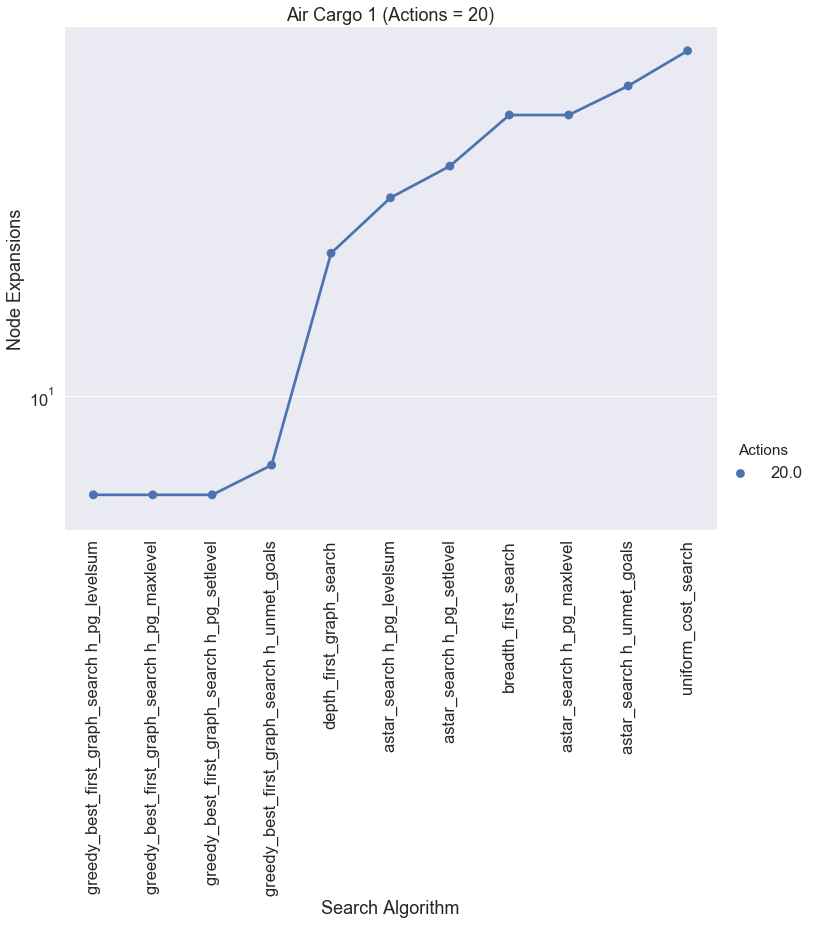

In [10]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Search", y="Expansions", data=actions20_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(title="Air Cargo 1 (Actions = 20)")
chart.set(xlabel='Search Algorithm', ylabel='Node Expansions')

In [11]:
actions72 = df['Actions']==72
actions72_df = df[actions72].sort_values(by=['Expansions'])
actions72_df = actions72_df.set_index(np.arange(1,12))
drop_cols = ['Plan Length', 'New_Nodes', 'Time']
actions72_df = actions72_df.drop(drop_cols, 1)
actions72_df

,Problem,Search,Actions,Expansions
1,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,72.0,9.0
2,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,72.0,11.0
3,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,72.0,17.0
4,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,72.0,27.0
5,Air Cargo 2,astar_search h_pg_levelsum,72.0,357.0
6,Air Cargo 2,depth_first_graph_search,72.0,624.0
7,Air Cargo 2,astar_search h_pg_setlevel,72.0,1037.0
8,Air Cargo 2,astar_search h_unmet_goals,72.0,2467.0
9,Air Cargo 2,astar_search h_pg_maxlevel,72.0,2887.0
10,Air Cargo 2,breadth_first_search,72.0,3343.0


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


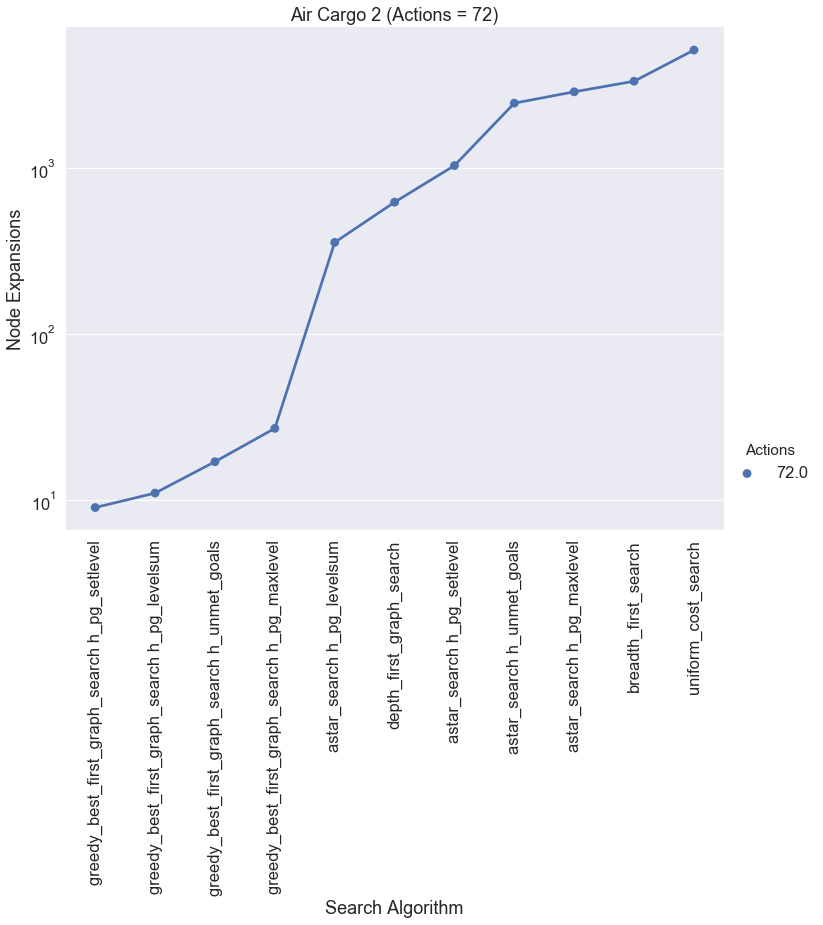

In [13]:
sns.set(font_scale=1.5) 
chart = sns.catplot(x="Search", y="Expansions", data=actions72_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(title="Air Cargo 2 (Actions = 72)")
chart.set(xlabel='Search Algorithm', ylabel='Node Expansions')

In [14]:
actions88 = df['Actions']==88
actions88_df = df[actions88].sort_values(by=['Expansions'])
actions88_df = actions88_df.set_index(np.arange(1,10))
drop_cols = ['Plan Length', 'New_Nodes', 'Time']
actions88_df = actions88_df.drop(drop_cols, 1)
actions88_df

,Problem,Search,Actions,Expansions
1,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,88.0,14.0
2,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,88.0,21.0
3,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,88.0,25.0
4,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,88.0,35.0
5,Air Cargo 3,astar_search h_pg_levelsum,88.0,369.0
6,Air Cargo 3,depth_first_graph_search,88.0,408.0
7,Air Cargo 3,astar_search h_unmet_goals,88.0,7388.0
8,Air Cargo 3,breadth_first_search,88.0,14663.0
9,Air Cargo 3,uniform_cost_search,88.0,18510.0


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


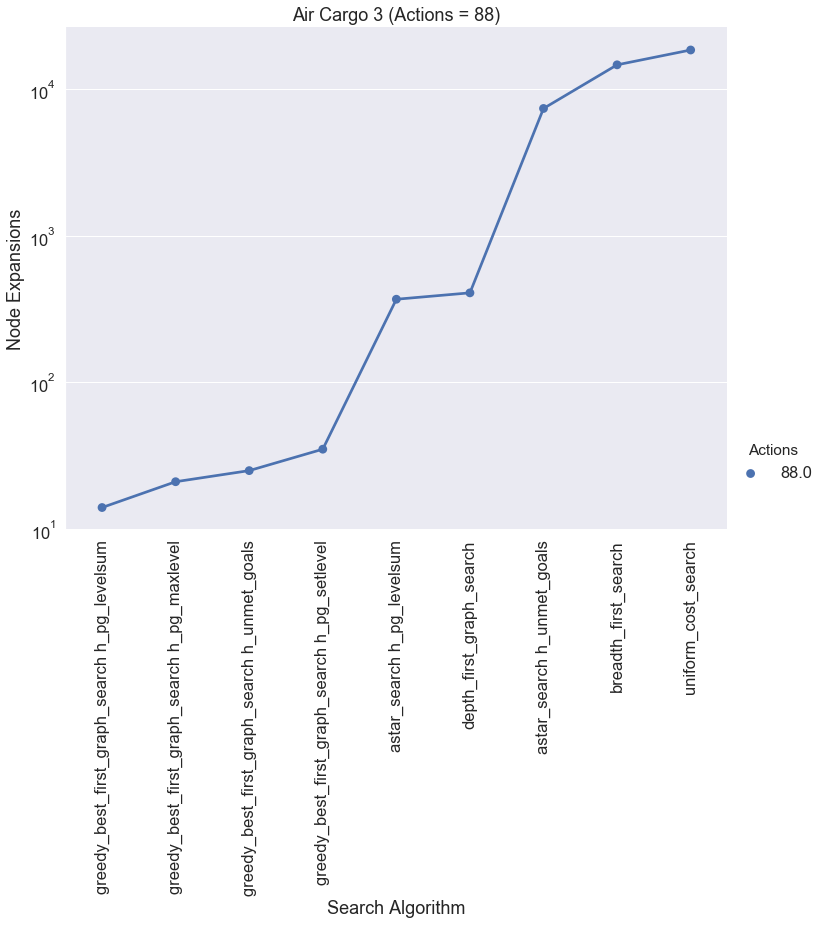

In [16]:
sns.set(font_scale=1.5) 
chart = sns.catplot(x="Search", y="Expansions", data=actions88_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 3"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(title="Air Cargo 3 (Actions = 88)")
chart.set(xlabel='Search Algorithm', ylabel='Node Expansions')

In [17]:
actions104 = df['Actions']==104
actions104_df = df[actions104].sort_values(by=['Expansions'])
actions104_df = actions104_df.set_index(np.arange(1,8))
drop_cols = ['Plan Length', 'New_Nodes', 'Time']
actions104_df = actions104_df.drop(drop_cols, 1)
actions104_df

,Problem,Search,Actions,Expansions
1,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,104.0,17.0
2,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,104.0,29.0
3,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,104.0,56.0
4,Air Cargo 4,astar_search h_pg_levelsum,104.0,1208.0
5,Air Cargo 4,astar_search h_unmet_goals,104.0,34330.0
6,Air Cargo 4,breadth_first_search,104.0,99736.0
7,Air Cargo 4,uniform_cost_search,104.0,113339.0


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


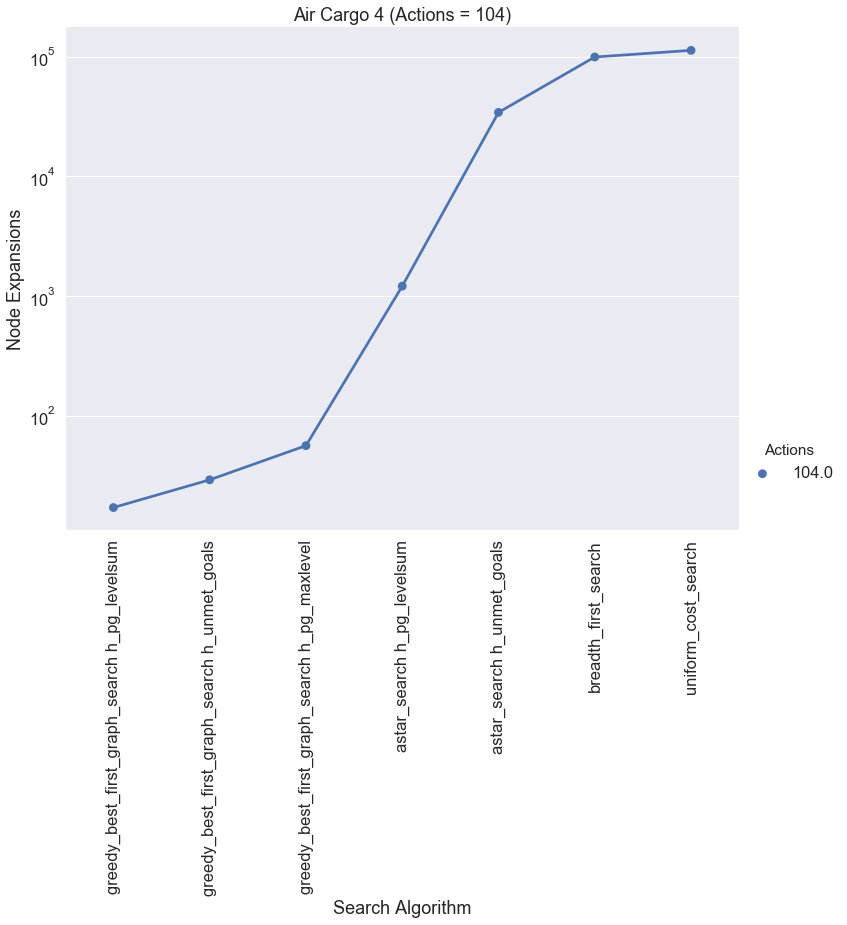

In [18]:
sns.set(font_scale=1.5) 
chart = sns.catplot(x="Search", y="Expansions", data=actions104_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 4"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(title="Air Cargo 4 (Actions = 104)")
chart.set(xlabel='Search Algorithm', ylabel='Node Expansions')

### Question 1 Observations:
Uniform Cost Search has the most number of node expansions over all action domains. The Greedy Best First Graph search algorithm (with various heuristics) has the fewest number of node expansions across all action domains.

## Question 2
##### Use a table or chart to analyze the search time against the number of actions in the domain

In [19]:
actions20 = df['Actions']==20
actions20_df = df[actions20].sort_values(by=['Time'])
actions20_df = actions20_df.set_index(np.arange(1,12))
drop_cols = ['Plan Length', 'New_Nodes', 'Expansions']
actions20_df = actions20_df.drop(drop_cols, 1)
actions20_df

,Problem,Search,Actions,Time
1,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,20.0,0.002853
2,Air Cargo 1,depth_first_graph_search,20.0,0.007548
3,Air Cargo 1,breadth_first_search,20.0,0.013725
4,Air Cargo 1,astar_search h_unmet_goals,20.0,0.026745
5,Air Cargo 1,uniform_cost_search,20.0,0.030729
6,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,20.0,0.118073
7,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,20.0,0.267435
8,Air Cargo 1,astar_search h_pg_levelsum,20.0,0.591940
9,Air Cargo 1,astar_search h_pg_maxlevel,20.0,0.642644
10,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,20.0,0.685915


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


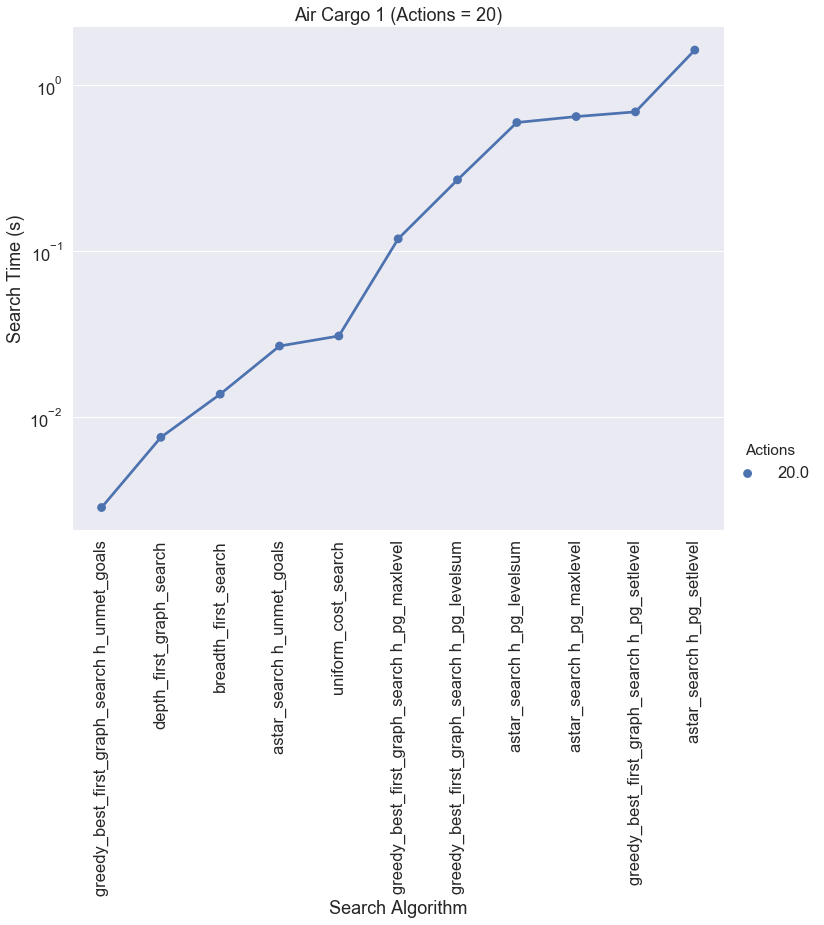

In [21]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Search", y="Time", data=actions20_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 1"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(xlabel='Search Algorithm', ylabel='Search Time (s)')
chart.set(title="Air Cargo 1")
chart.set(title="Air Cargo 1 (Actions = 20)")

In [22]:
actions72_df = df[actions72].sort_values(by=['Time'])
actions72_df = actions72_df.set_index(np.arange(1,12))
drop_cols = ['Plan Length', 'New_Nodes', 'Expansions']
actions72_df = actions72_df.drop(drop_cols, 1)
actions72_df

,Problem,Search,Actions,Time
1,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,72.0,0.033020
2,Air Cargo 2,astar_search h_unmet_goals,72.0,3.123567
3,Air Cargo 2,breadth_first_search,72.0,3.209949
4,Air Cargo 2,depth_first_graph_search,72.0,3.927302
5,Air Cargo 2,uniform_cost_search,72.0,4.933355
6,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,72.0,5.324338
7,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,72.0,8.308828
8,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,72.0,20.535056
9,Air Cargo 2,astar_search h_pg_levelsum,72.0,141.020214
10,Air Cargo 2,astar_search h_pg_maxlevel,72.0,925.653842


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


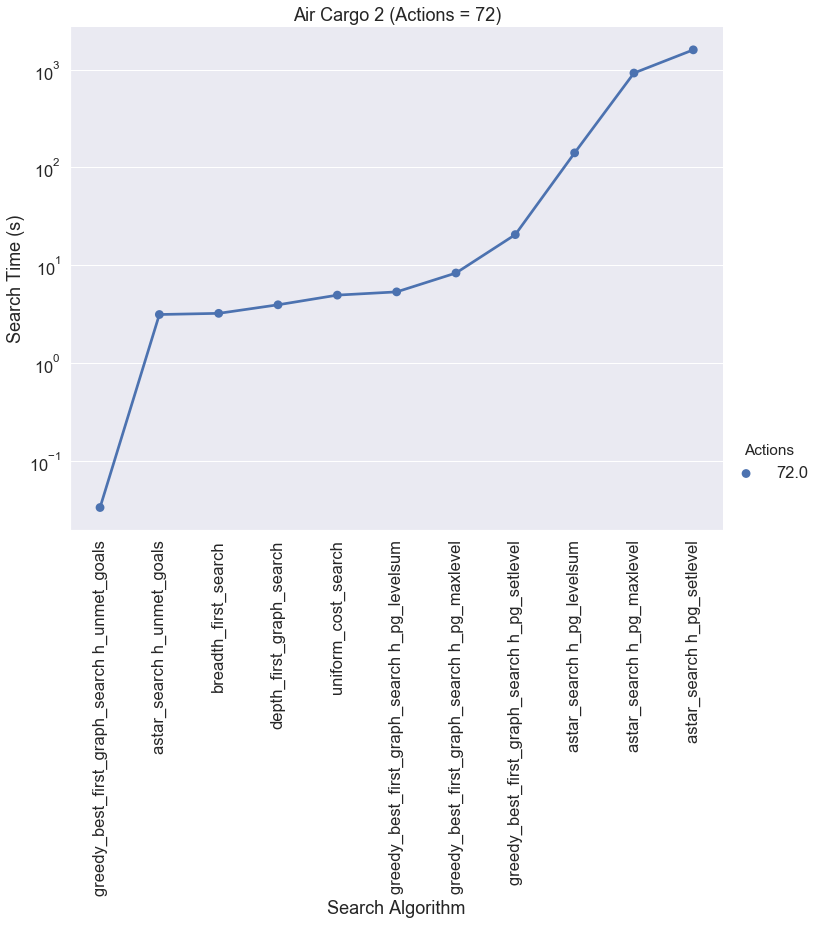

In [23]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Search", y="Time", data=actions72_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 2"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(xlabel='Search Algorithm', ylabel='Search Time (s)')
chart.set(title="Air Cargo 2")
chart.set(title="Air Cargo 2 (Actions = 72)")

In [24]:
actions88_df = df[actions88].sort_values(by=['Time'])
actions88_df = actions88_df.set_index(np.arange(1,10))
drop_cols = ['Plan Length', 'New_Nodes', 'Expansions']
actions88_df = actions88_df.drop(drop_cols, 1)
actions88_df

,Problem,Search,Actions,Time
1,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,88.0,0.073953
2,Air Cargo 3,depth_first_graph_search,88.0,1.652330
3,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,88.0,12.614300
4,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,88.0,12.787025
5,Air Cargo 3,astar_search h_unmet_goals,88.0,13.789529
6,Air Cargo 3,breadth_first_search,88.0,16.081353
7,Air Cargo 3,uniform_cost_search,88.0,21.110852
8,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,88.0,98.556015
9,Air Cargo 3,astar_search h_pg_levelsum,88.0,268.832396


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


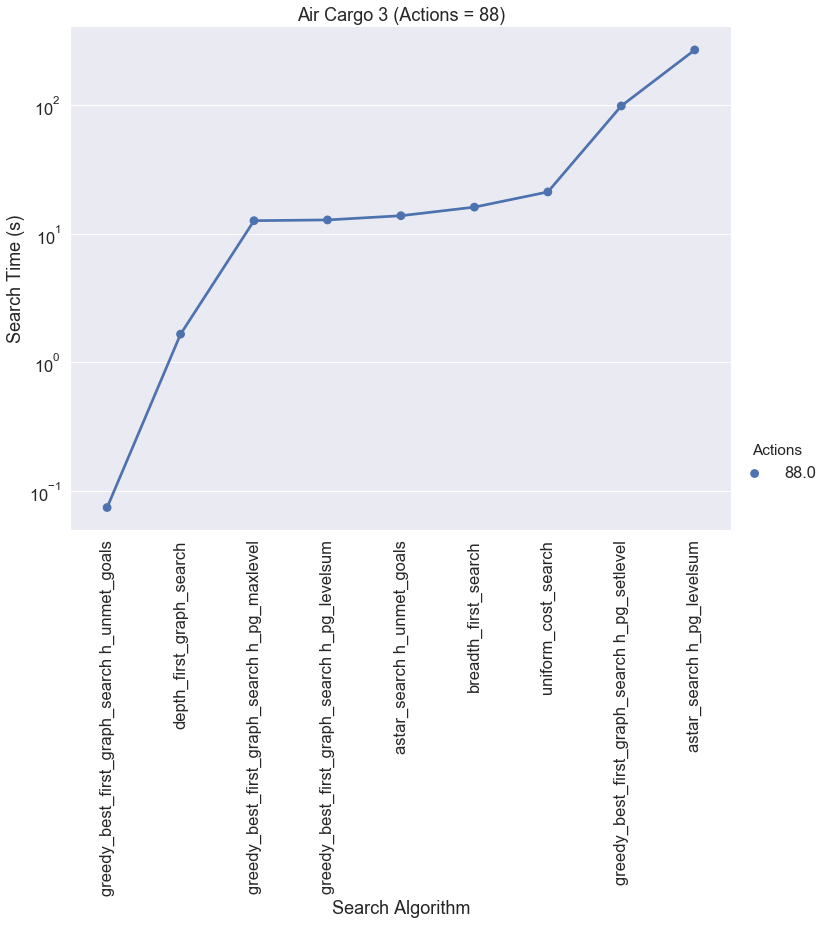

In [25]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Search", y="Time", data=actions88_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 3"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(xlabel='Search Algorithm', ylabel='Search Time (s)')
chart.set(title="Air Cargo 3")
chart.set(title="Air Cargo 3 (Actions = 88)")

In [26]:
actions104_df = df[actions104].sort_values(by=['Time'])
actions104_df = actions104_df.set_index(np.arange(1,8))
drop_cols = ['Plan Length', 'New_Nodes', 'Expansions']
actions104_df = actions104_df.drop(drop_cols, 1)
actions104_df

,Problem,Search,Actions,Time
1,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,104.0,0.052704
2,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,104.0,13.648721
3,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,104.0,22.191153
4,Air Cargo 4,astar_search h_unmet_goals,104.0,47.727950
5,Air Cargo 4,breadth_first_search,104.0,85.410903
6,Air Cargo 4,uniform_cost_search,104.0,97.271088
7,Air Cargo 4,astar_search h_pg_levelsum,104.0,948.859392


/Users/urvipatel/anaconda/envs/aind/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


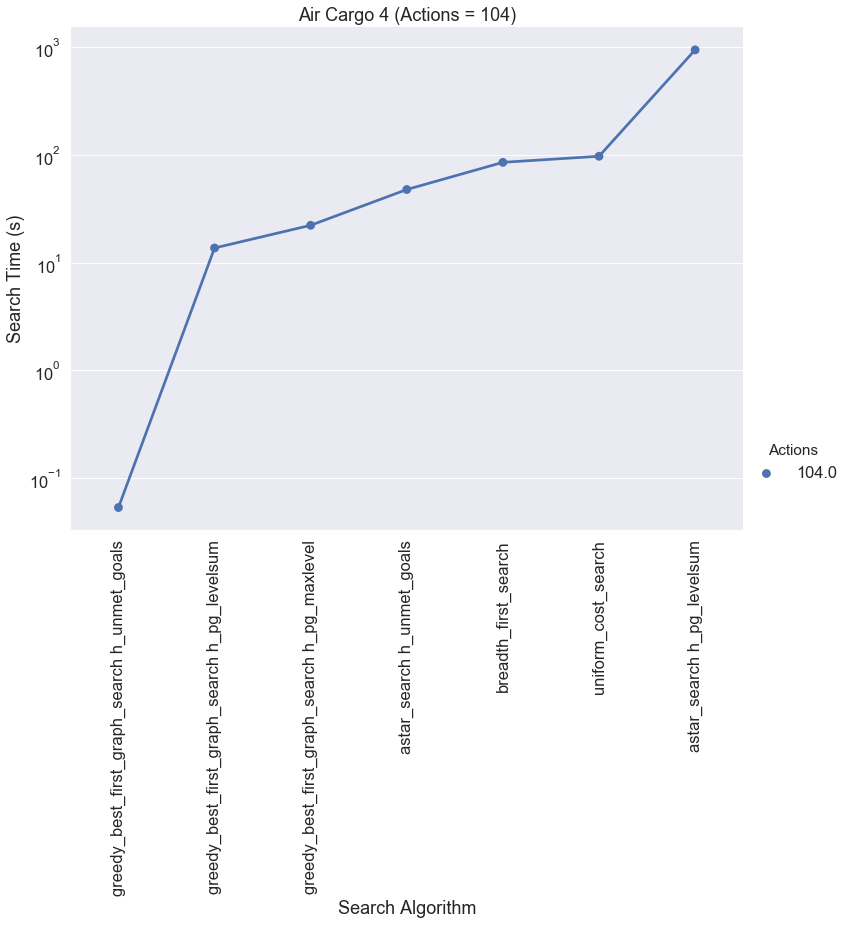

In [27]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Search", y="Time", data=actions104_df, height=8.27, aspect=11.7/8.27, kind="point", hue="Actions")
chart.set_title = "Air Cargo 4"
chart.set_xticklabels(rotation=90)
chart.set(yscale="log")
chart.set(xlabel='Search Algorithm', ylabel='Search Time (s)')
chart.set(title="Air Cargo 4 (Actions = 104)")

### Question 2 Observations:
A* search with various heuristics takes the most amount of time to search in any given action domain.
Greedy best first graph search with h_unmet_goals takes the least amount of search time for all action domains.

## Question 3
##### Use a table or chart to analyze the length of the plans returned by each algorithm on all search problems

In [28]:
bfs = df['Search']=='breadth_first_search'
bfs_df = df[bfs]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
bfs_df = bfs_df.drop(drop_cols, 1)
bfs_df

,Problem,Search,Plan Length
0,Air Cargo 1,breadth_first_search,6.0
11,Air Cargo 2,breadth_first_search,9.0
22,Air Cargo 3,breadth_first_search,12.0
33,Air Cargo 4,breadth_first_search,14.0


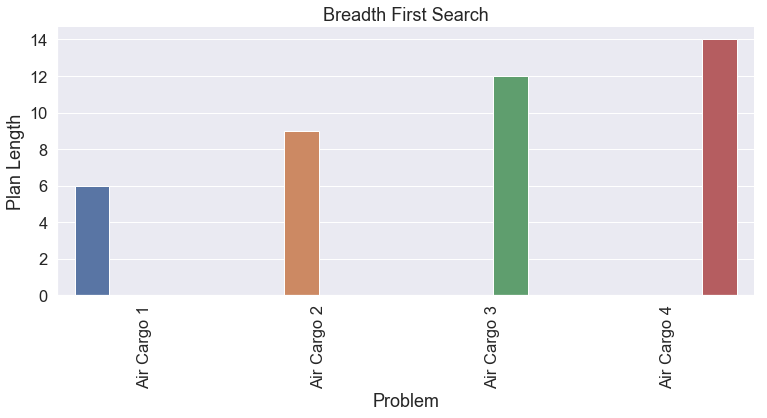

In [72]:
sns.set(font_scale=1.5) 

chart = sns.catplot(x="Problem", y='Plan Length', data=bfs_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Breadth First Search")

In [36]:
dfs = df['Search']=='depth_first_graph_search'
dfs_df = df[dfs]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
dfs_df = dfs_df.drop(drop_cols, 1)
dfs_df

,Problem,Search,Plan Length
1,Air Cargo 1,depth_first_graph_search,20.0
12,Air Cargo 2,depth_first_graph_search,619.0
23,Air Cargo 3,depth_first_graph_search,392.0


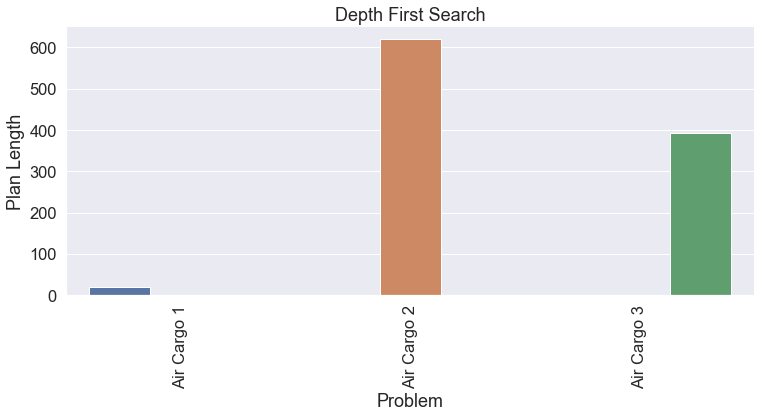

In [71]:
chart = sns.catplot(x="Problem", y='Plan Length', data=dfs_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Depth First Search")

In [62]:
ucs = df['Search']=='uniform_cost_search'
ucs_df = df[ucs]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
ucs_df = ucs_df.drop(drop_cols, 1)
ucs_df

,Problem,Search,Plan Length
2,Air Cargo 1,uniform_cost_search,6.0
13,Air Cargo 2,uniform_cost_search,9.0
24,Air Cargo 3,uniform_cost_search,12.0
35,Air Cargo 4,uniform_cost_search,14.0


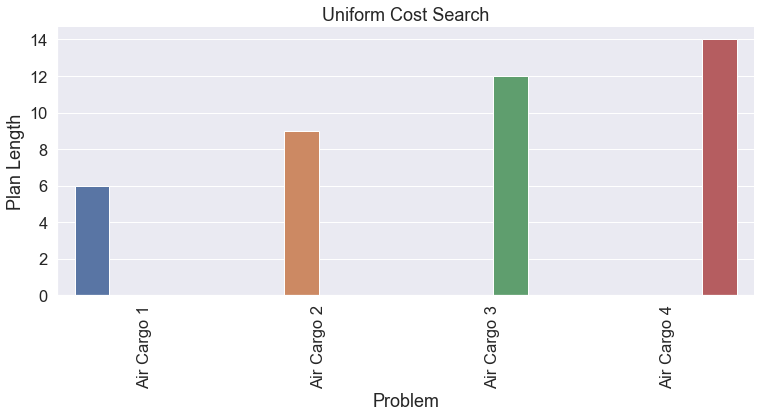

In [70]:
chart = sns.catplot(x="Problem", y='Plan Length', data=ucs_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Uniform Cost Search")

In [64]:
greedy_unmet_goals = df['Search']=='greedy_best_first_graph_search h_unmet_goals'
greedy_unmet_goals_df = df[greedy_unmet_goals]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
greedy_unmet_goals_df = greedy_unmet_goals_df.drop(drop_cols, 1)
greedy_unmet_goals_df

,Problem,Search,Plan Length
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0
14,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,9.0
25,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,15.0
36,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,18.0


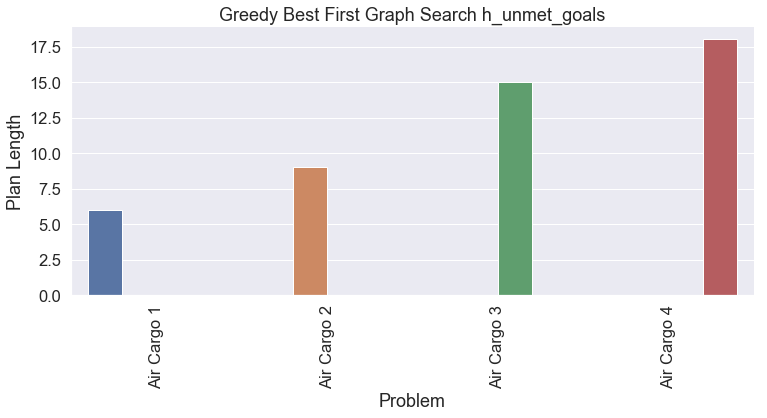

In [73]:
chart = sns.catplot(x="Problem", y='Plan Length', data=greedy_unmet_goals_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Greedy Best First Graph Search h_unmet_goals")

In [66]:
greedy_levelsum = df['Search']=='greedy_best_first_graph_search h_pg_levelsum'
greedy_levelsum_df = df[greedy_levelsum]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
greedy_levelsum_df = greedy_levelsum_df.drop(drop_cols, 1)
greedy_levelsum_df

,Problem,Search,Plan Length
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0


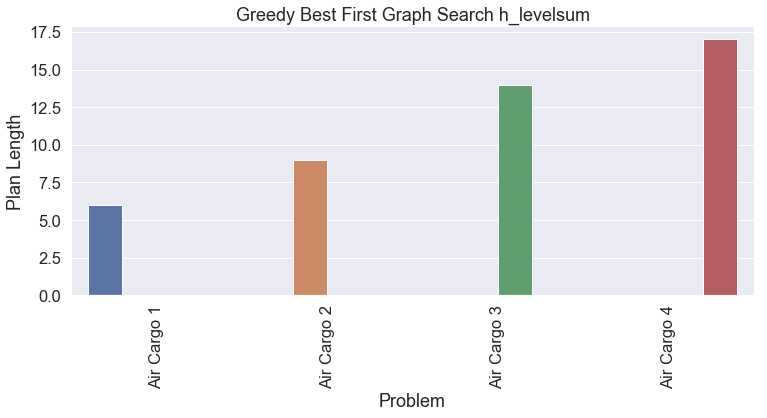

In [74]:
chart = sns.catplot(x="Problem", y='Plan Length', data=greedy_levelsum_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Greedy Best First Graph Search h_levelsum")

In [68]:
greedy_maxlevel = df['Search']=='greedy_best_first_graph_search h_pg_maxlevel'
greedy_maxlevel_df = df[greedy_maxlevel]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
greedy_maxlevel_df = greedy_maxlevel_df.drop(drop_cols, 1)
greedy_maxlevel_df

,Problem,Search,Plan Length
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0


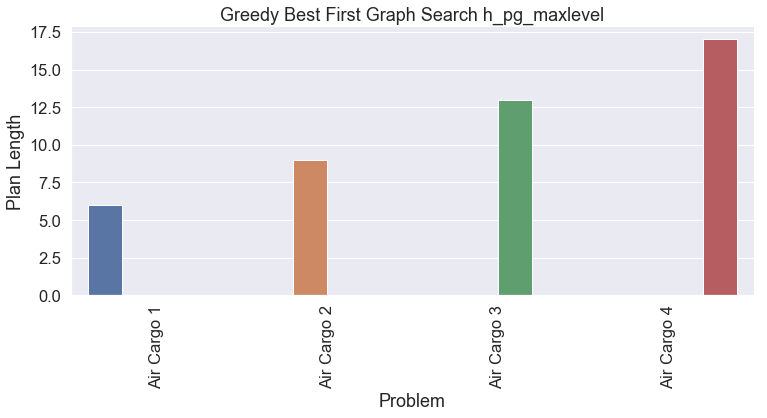

In [75]:
chart = sns.catplot(x="Problem", y='Plan Length', data=greedy_maxlevel_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Greedy Best First Graph Search h_pg_maxlevel")

In [47]:
greedy_setlevel = df['Search']=='greedy_best_first_graph_search h_pg_setlevel'
greedy_setlevel_df = df[greedy_setlevel]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
greedy_setlevel_df = greedy_setlevel_df.drop(drop_cols, 1)
greedy_setlevel_df

,Problem,Search,Plan Length
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0


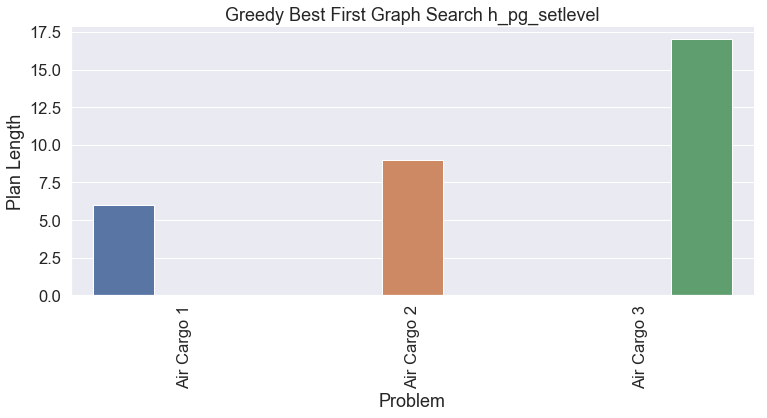

In [76]:
chart = sns.catplot(x="Problem", y='Plan Length', data=greedy_setlevel_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="Greedy Best First Graph Search h_pg_setlevel")

In [49]:
astar_unmet_goals = df['Search']=='astar_search h_unmet_goals'
astar_unmet_goals_df = df[astar_unmet_goals]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
astar_unmet_goals_df = astar_unmet_goals_df.drop(drop_cols, 1)
astar_unmet_goals_df

,Problem,Search,Plan Length
7,Air Cargo 1,astar_search h_unmet_goals,6.0
18,Air Cargo 2,astar_search h_unmet_goals,9.0
29,Air Cargo 3,astar_search h_unmet_goals,12.0
40,Air Cargo 4,astar_search h_unmet_goals,14.0


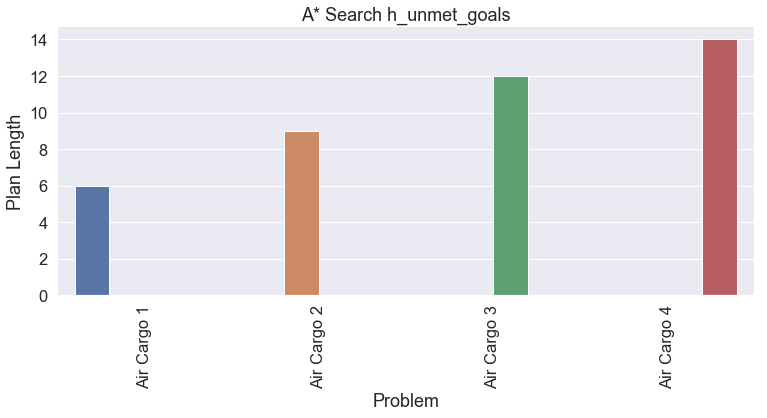

In [77]:
chart = sns.catplot(x="Problem", y='Plan Length', data=astar_unmet_goals_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="A* Search h_unmet_goals")

In [51]:
astar_levelsum = df['Search']=='astar_search h_pg_levelsum'
astar_levelsum_df = df[greedy_levelsum]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
astar_levelsum_df = astar_levelsum_df.drop(drop_cols, 1)
astar_levelsum_df

,Problem,Search,Plan Length
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0


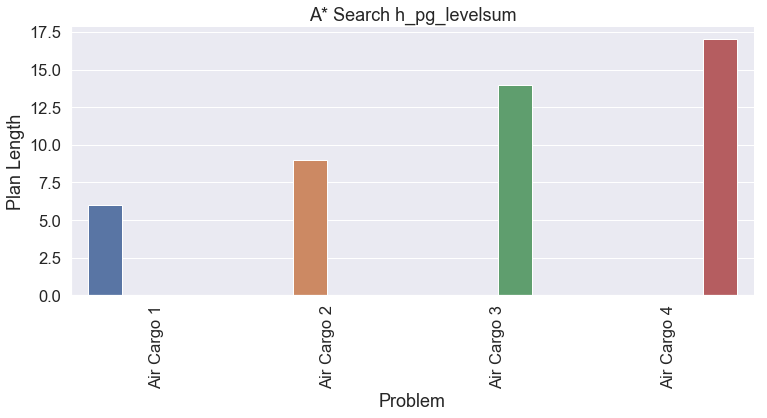

In [78]:
chart = sns.catplot(x="Problem", y='Plan Length', data=astar_levelsum_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="A* Search h_pg_levelsum")

In [53]:
astar_maxlevel = df['Search']=='astar_search h_pg_maxlevel'
astar_maxlevel_df = df[greedy_maxlevel]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
astar_maxlsum_df = astar_maxlevel_df.drop(drop_cols, 1)
astar_maxlevel_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0,72.0,27.0,249.0,8.308828
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0,88.0,21.0,195.0,12.614300
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0,104.0,56.0,580.0,22.191153


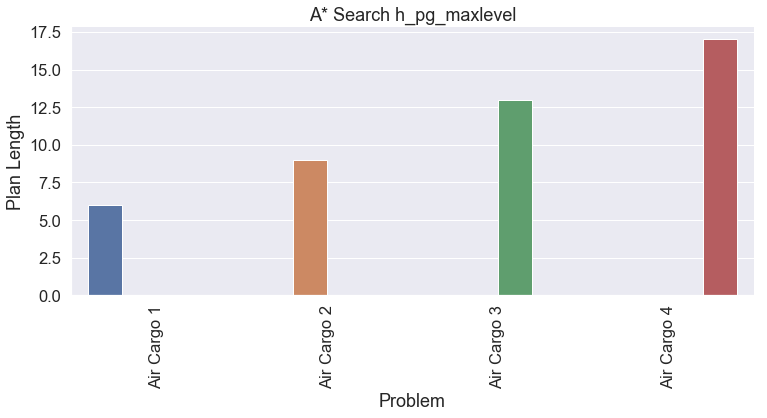

In [79]:
chart = sns.catplot(x="Problem", y='Plan Length', data=astar_maxlevel_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="A* Search h_pg_maxlevel")

In [55]:
astar_setlevel = df['Search']=='astar_search h_pg_setlevel'
astar_setlevel_df = df[greedy_setlevel]
drop_cols = ['Time', 'New_Nodes', 'Expansions', 'Actions']
astar_setlevel_df = astar_setlevel_df.drop(drop_cols, 1)
astar_setlevel_df

,Problem,Search,Plan Length
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0


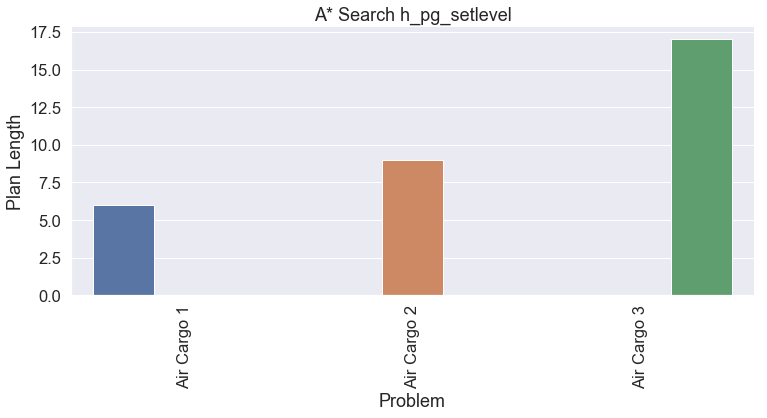

In [80]:
chart = sns.catplot(x="Problem", y='Plan Length', data=astar_setlevel_df, height=5, aspect=11/5, kind="bar", hue="Problem")
chart.set_xticklabels(rotation=90)
chart.set(title="A* Search h_pg_setlevel")

### Question 3 Observations:
The plan length remained largely the same across all algorithms for each search problem--with one notable exception: The Depth First Search generated much longer plan lengths than other algorithms.

## Question 4
##### Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?

Greedy Best First Graph Search with Unmet Goals Heuristic would be the most appropriate for planning a very restricted domain that needs to operate in real time because this algorithm finds the solution very fast compared to the others.

## Question 5
##### Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)

Greedy Best First Graph Search with Unmet Goals Heuristic would be the most appropriate for planning a large domain that needs to operate in real time because this algorithm finds the solution very fast compared to the others.

## Question 6
##### Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?

A* and Greedy Best First Graph Search would both work for planning problems where it is important to find only optimal plans because they continue searching for an optimum path even after the solution has been found.